**Projet numérique Lotka-Volterra**

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import display

In [5]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

**Question 1**

On a :
$\begin{cases}
\dot x_1 = \alpha x_1 - \beta x_1x_2 \\
\dot x_2 = -\gamma x_2 + \delta x_1x_2
\end{cases}$
avec $x_1$ le nombre de proies et $x_2$ le nombre de prédateurs et ($\alpha$,$\beta$,$\gamma$,$\delta$) des paramètre strictement positifs.

Ce sytème correspond à l'équation $\dot x = f(x_1,x_2)$ avec 

$\begin{cases}
f:\mathbf{R^2_{>0}}\longrightarrow \mathbf{R^2}\\
x = (x_1,x_2) \longrightarrow (\alpha x_1 - \beta x_1x_2 \, -\gamma x_2 + \delta x_1x_2)
\end{cases}$


$\alpha$ correspond au taux de reproduction des proies et $\beta$ au nombre de proies mangées par prédateurs.

$\gamma$ correspond au pourcentage de prédateurs qui meurent et $\delta$ au pourcentage de ceux qui se reproduisent car ils ont mangés des proies.

A l'équilibre, $\dot x_1 = 0$ et $\dot x_2 = 0$ ce qui donne, 
$\begin{cases}
\alpha x_1 = \beta x_1x_2\\
\gamma x_2 = \delta x_1x_2
\end{cases}$
donc 
$x_1 = 0$ ou $x_2 = \frac {\alpha} {\beta}$ et
$x_2 = 0$ ou $x_1 = \frac {\gamma} {\delta}$.

Cela donne donc 2 points d'équilibres : (0,0) et $\overline{x}$ = ($\frac {\gamma} {\delta}$, $\frac {\alpha} {\beta}$).

f est continûment différentiable donc on calcule la matrice jacobienne de la fonction pour étudier la stabilité de ces points d'équilibre :

$J_f (x_1,x_2) = \begin{pmatrix}\alpha - \beta x_2 &- \beta x_1 \\ \delta x_2 & -\gamma + \delta x_1\end{pmatrix} \quad $

$J_f(0,0) = \begin{pmatrix}\alpha & 0 \\0 & -\gamma\end{pmatrix} \quad $ Les 2 valeurs propres sont donc $\alpha$>0 et $-\gamma$<0. Il existe donc une valeur propre de $J_f(0,0)$ à partie réelle strictement positive donc (0,0) est un point d'équilibre instable.

$J_f(\overline{x}) = \begin{pmatrix}0 &\frac {-\beta\gamma}{\delta} \\\frac {\alpha\delta}{\beta} & 0\end{pmatrix} \quad$ La matrice admet 0 comme unique valeur propre donc on ne peut pas conclure sur la stabilité du point d'équilibre $\overline{x}$.


***Pour simplifier les notations dans les codes, $\alpha$, $\beta$, $\gamma$ et $\delta$ seront écirts a, b, c et d.***

**Question 2**

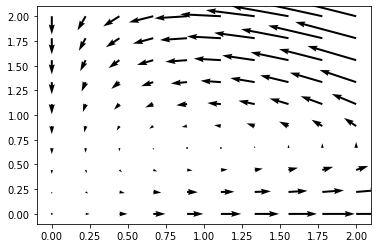

In [1]:
from matplotlib.pyplot import quiver, streamplot
import numpy as np
a = 0.2 
b = 0.3
c = 0.1
d = 0.1
[X,Y] = np.meshgrid([np.linspace(0,2,10)], [np.linspace(0,2,10)])
U = X*(a- b*Y)
V = Y*(-c + d*X)
quiver(X, Y, U, V)

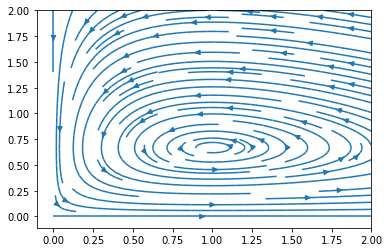

In [23]:
streamplot(X, Y, U, V)

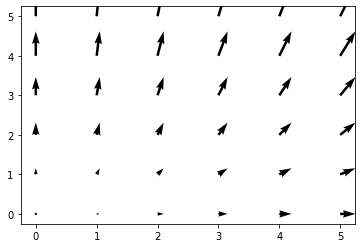

In [13]:
from matplotlib.pyplot import quiver
from numpy import meshgrid
[X,Y] = meshgrid([range (0,6)],[range (0,6)]);
U = 0.25*X;
V = 0.5*Y;
quiver(X,Y,U,V)

**Question 5**

In [34]:
def H(x1, x2):
    return (d*x1 - c*np.log(x1) + b*x2 -a*np.log(x2))

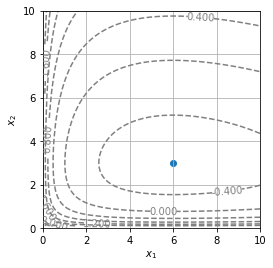

In [18]:
display_contour(
    H, 
    x=np.linspace(0, 10, 100), 
    y=np.linspace(0, 10, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.scatter(c/d, a/b)

$\overline{x}$ se situe au centre des courbes de niveaux de la fonction H. Les solutions convergent donc vers $\overline{x}$. Ainsi, $\overline{x}$ est bien graphiquement stable car toute solution maximale reste infiniment proche de ce point.

**Question 6**

In [48]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)
    d = x0.size
    x = np.zeros((d, N))
    x[:, 0] = x0
    for i in range (1, N):
        x[:, i] = x[:, i-1] + dt*f(t[i-1], x[:, i-1])
    return t, x

In [49]:
#test sur dx/dt = b*x
b=0.1
c=0.2
def f2(t, X):
    return(np.array([b*X[0], c*X[1]]))

In [50]:
solve_euler_explicit(f2, np.array([1, 2]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[1.     , 1.1    , 1.21   , 1.331  , 1.4641 , 1.61051],
        [2.     , 2.4    , 2.88   , 3.456  , 4.1472 , 4.97664]]))

In [51]:
#test sur d2x/dt2 = b**2*x
def f1(t, X):
    return np.array([X[1], b**2*X[0]])

In [52]:
solve_euler_explicit(f1, np.array([0, 1]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[0.    , 1.    , 2.    , 3.01  , 4.04  , 5.1001],
        [1.    , 1.    , 1.01  , 1.03  , 1.0601, 1.1005]]))

Tests corrects mais tout de même une certaine erreur d'arrondi ...

**Question 7**

In [84]:
#Volterra
a = 0.6
b = 0.4
c = 0.7
d = 0.2
def f(t, X):
    return np.array([X[0]*(a-b*X[1]), X[1]*(-c+d*X[0])])

In [85]:
t, [x1, x2] = solve_euler_explicit(f, np.array([10, 10]), 0.01, 0, 100)

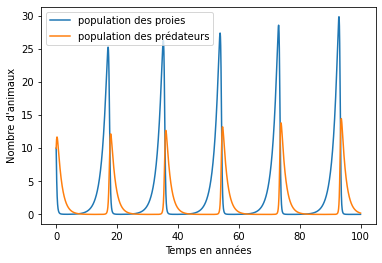

In [86]:
plt.plot(t, x1, label='population des proies')
plt.plot(t, x2, label='population des prédateurs')
plt.xlabel('Temps en années')
plt.ylabel("Nombre d'animaux")
plt.legend()
plt.show()

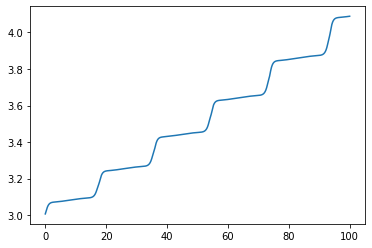

In [87]:
plt.plot(t, H(x1,x2))

**Question 8**

In [71]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    t = [t0 + k*dt for k in range(0, int(np.floor((tf-t0)/dt)))]
    t.append(tf)
    N = len(t)+1
    d = x0.size
    x = np.zeros((d, N-1))
    x[:, 0] = x0
    for i in range (1, N-1):
        print (f(t[i], x[:, i]))
        x[:, i] = x[:, i-1] + dt*f(t[i], x[:, i])
    return t, x

In [72]:
solve_euler_implicit(f2, np.array([1]), 1, 0, 5)

[0.]
[0.]
[0.]
[0.]
[0.]


([0, 1, 2, 3, 4, 5], array([[1., 1., 1., 1., 1., 1.]]))

In [70]:
solve_euler_implicit(f1, np.array([2, 1]), 1, 0, 5)

([0, 1, 2, 3, 4, 5],
 array([[2., 2., 2., 2., 2., 2.],
        [1., 1., 1., 1., 1., 1.]]))